In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.sql.expression import asc, desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
#Inspect the columns of the table
inspector = inspect(engine)
columns = inspector.get_columns('hawaii')
for c in columns:
    print(c['name'], c["type"])

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Find the most recent date
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

# Find the date a year before from most recent
last_date = most_recent[0]
year_before = last_date.replace(year = (last_date.year - 1))
year_before = year_before.strftime("%y-%m-%d")
year_before







In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
precip_data


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [53]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.read_sql(precip_data.statement, precip_data.session.bind)
precip_df.set_index('date', inplace=True)
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [49]:
# Sort the dataframe by date
result= precip_df.sort_values(["date"])
result.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


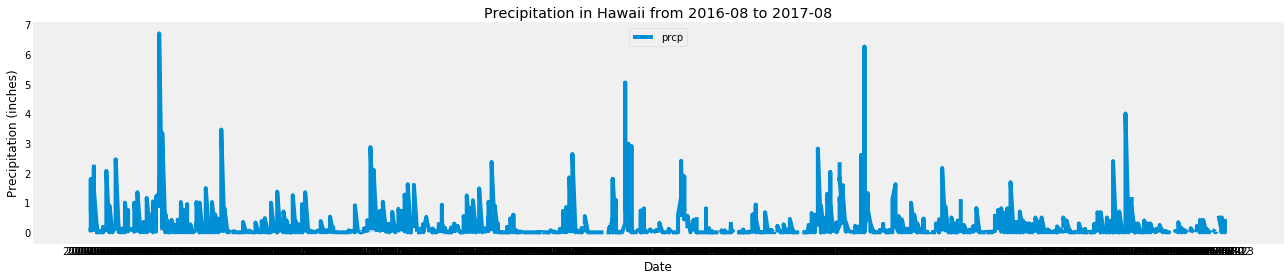

In [50]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(18,4))
plt.plot(precip_df.index, precip_df["prcp"])
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")

plt.title("Precipitation in Hawaii from 2016-08 to 2017-08")

plt.grid()

plt.tight_layout()

plt.legend(loc='upper center',frameon = True)

plt.show()

![precipitation](Images/precipitation.png)

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [55]:
# Design a query to show how many stations are available in this dataset?
station_data = session.query(Measurement.station).group_by(Measurement.station).count()
station_data

9

In [12]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station= session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
active_station


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()
tobs

[('2016-08-23', 81.0),
 ('2016-08-23', 76.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 80.0),
 ('2016-08-23', 77.0),
 ('2016-08-23', 74.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 76.0),
 ('2016-08-24', 80.0),
 ('2016-08-24', 78.0),
 ('2016-08-24', 79.0),
 ('2016-08-24', 77.0),
 ('2016-08-24', 74.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 81.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 80.0),
 ('2016-08-25', 77.0),
 ('2016-08-26', 79.0),
 ('2016-08-26', 78.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 81.0),
 ('2016-08-26', 84.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 77.0),
 ('2016-08-27', 73.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 81.0),
 ('2016-08-27', 75.0),
 ('2016-08-27', 74.0),
 ('2016-08-28', 78.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-28', 73.0),
 ('2016-08-28', 71.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-29', 80.0),
 ('2016-08-29', 80.0),
 ('2016-08-

C:\Users\hchan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Observed Temperature at WAIHEE from 08/23/2016 to 08/23/2017')

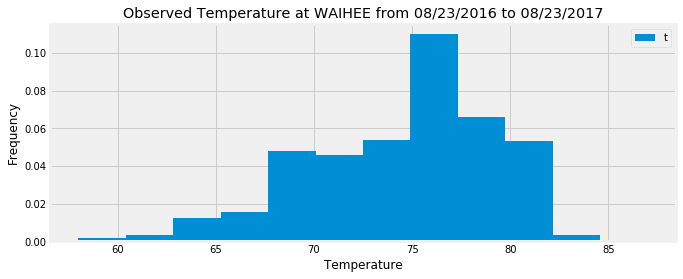

In [29]:
#Plot results as Histogram
plt.figure(figsize=(10,4))
temps = [x[1] for x in tobs]
plt.hist(temps, normed=True, bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend("tobs",loc='upper right',frameon = True)
plt.title("Observed Temperature at WAIHEE from 08/23/2016 to 08/23/2017")


![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
class Temp():
    def __init__(self, minimum, average, maximum):
        self.minimum = minimum
        self.average = average
        self.maximum = maximum
        
def calc_temps(start_date, end_date):
    minimum = session.query(func.min(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Minimum temp: {minimum}")
    average = session.query(func.round(func.avg(Measurement.tobs))).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Average temp: {average}")
    maximum = session.query(func.max(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).scalar()
    print(f"Maximum temp: {maximum}")
    
    result = [{"Minimum":minimum},{"Maximum":maximum},{"Average":average}]
    result = Temp(minimum, average, maximum)
    return result    

t = calc_temps('2012-02-28', '2012-03-05')
t.minimum, t.average, t.maximum


Minimum temp: 62.0
Average temp: 70.0
Maximum temp: 74.0


(62.0, 70.0, 74.0)

In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
previousYearTemps = calc_temps('2011-02-28', '2011-03-05')
previousYearTemps.minimum, previousYearTemps.average, previousYearTemps.maximum

Minimum temp: 61.0
Average temp: 70.0
Maximum temp: 75.0


(61.0, 70.0, 75.0)

<BarContainer object of 1 artists>

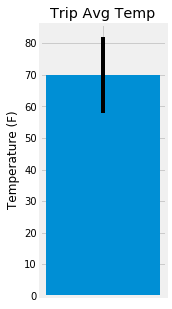

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,5))
plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")
plt.bar(1, t.average, yerr = (t.maximum - t.minimum), tick_label = "")

In [46]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Rainfall_Per_Station = session.query(Measurement.station,Station.name, Station.latitude,Station.longitude,Station.elevation, func.sum(Measurement.prcp)).filter(Measurement.date.between ('2011-02-28', '2011-03-05')).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
Rainfall_Per_Station

[('USC00518838',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  20.970000000000006),
 ('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  20.07000000000001),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  19.709999999999987),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  17.640000000000008),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  13.04999999999999),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  12.96000000000001),
 ('USC00519397',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  12.420000000000003),
 ('USC00511918',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.669999999999999),
 ('USC00517948',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  None)]

## Optional Challenge Assignment